### Imports

In [148]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import datetime

In [149]:
df = pd.read_csv('data/Final_merged_dataset_clean.csv')

In [150]:
df.head(5)

id  home_team_api_id  away_team_api_id  crossing_h  finishing_h  \
0  1729             10260             10261        81.0         72.0   
1  1730              9825              8659        77.0         80.0   
2  1731              8472              8650        79.0         66.0   
3  1732              8654              8528        81.0         71.0   
4  1734              8668              8655        74.0         80.0   

   heading_accuracy_h  short_passing_h  volleys_h  dribbling_h  curve_h  ...  \
0                81.0             81.0       79.0         79.0     79.0  ...   
1                90.0             88.0       79.0         79.0     80.0  ...   
2                78.0             82.0       69.0         80.0     78.0  ...   
3                77.0             87.0       69.0         81.0     80.0  ...   
4                74.0             83.0       77.0         80.0     78.0  ...   

   defenceAggression_h  defenceTeamWidth_h  buildUpPlaySpeed_a  \
0            48.000000           54.833333           58.166667   
1            46.500000           50.500000           57.500000   
2            52.166667           51.833333           57.666667   
3            42.833333           40.166667           47.166667   
4            57.500000           56.333333           52.500000   

   buildUpPlayPassing_a  chanceCreationPassing_a  chanceCreationCrossing_a  \
0             55.333333                53.500000                 57.333333   
1             51.500000                53.000000                 56.000000   
2             44.333333                41.333333                 47.833333   
3             50.666667                52.666667                 55.500000   
4             63.833333                57.000000                 56.000000   

   chanceCreationShooting_a  defencePressure_a  defenceAggression_a  \
0                 49.833333          46.666667            48.333333   
1                 54.666667          43.000000            45.666667   
2                 57.333333          51.000000            52.500000   
3                 45.500000          50.000000            54.000000   
4                 42.000000          45.666667            55.000000   

   defenceTeamWidth_a  
0           48.333333  
1           54.833333  
2           56.000000  
3           46.000000  
4           46.666667  

[5 rows x 96 columns]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['match_winner', 'id', 'home_team_api_id', 'away_team_api_id', 'fouls_h', 'fouls_a']), 
                                                    df.match_winner, test_size=0.3, 
                                                    random_state=47)

In [152]:
X_train.shape, X_test.shape

((9307, 90), (3990, 90))

In [153]:
y_train.shape, y_test.shape

((9307,), (3990,))

In [154]:
train_mean = y_train.mean()
train_mean

1.8189534758783712

Draw most likely outcome, though this could be influence by even distribution of wins and losses for home teams

In [155]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[1.81895348]])

In [156]:
X_defaults_median = X_train.median()
X_train = X_train.fillna(X_defaults_median)
X_test = X_test.fillna(X_defaults_median)

In [157]:
scaler = StandardScaler()

In [158]:
scaler.fit(X_train)

StandardScaler()

In [159]:
X_tr = scaler.transform(X_train)
X_te = scaler.transform(X_test)

# Logistic Regression

In [160]:
log_reg = LogisticRegression(max_iter = 200)

In [161]:
log_reg.fit(X_tr, y_train)

LogisticRegression(max_iter=200)

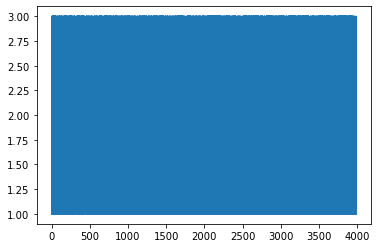

In [162]:
plt.plot(log_reg.predict(X_te))

# KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier()

In [164]:
knn.fit(X_tr, y_train)

KNeighborsClassifier()

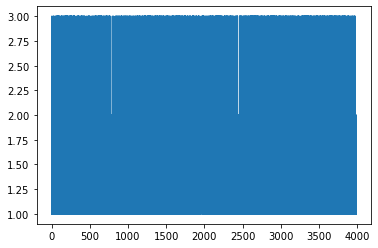

In [165]:
plt.plot(knn.predict(X_te))

# Random Forest

In [166]:
rf = RandomForestClassifier()

In [167]:
rf.fit(X_tr, y_train)

RandomForestClassifier()

In [168]:
plt.plot(rf.predict(X_te))

# Ridge Classifier

In [169]:
rc = RidgeClassifier()

In [170]:
rc.fit(X_tr, y_train)

RidgeClassifier()

In [171]:
plt.plot(rc.predict(X_te))

# Support Vectors

In [172]:
svc = SVC()

In [173]:
svc.fit(X_tr, y_train)

SVC()

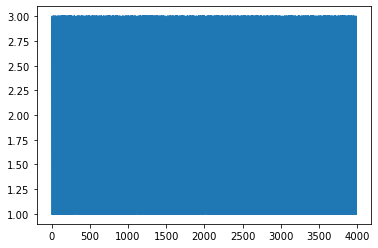

In [174]:
plt.plot(rf.predict(X_te))

# Initial Model Metrics

In [175]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score), 
           'recall' : make_scorer(recall_score)}

In [176]:
models = [log_reg, knn, rf, rc, svc]

In [177]:
kfold = KFold(n_splits=10)

In [178]:
for i, model in enumerate(models):
    cv_results = cross_validate(model, X_te, y_test, cv=kfold, scoring=scoring, n_jobs=-1)
    print(model, cv_results['test_accuracy'], cv_results['test_precision'], cv_results['test_recall'])

LogisticRegression(max_iter=200) [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
KNeighborsClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
RandomForestClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
RidgeClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
SVC() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]


In [179]:
for i, model in enumerate(models):
    print(model, model.score(X_te, y_test))

LogisticRegression(max_iter=200) 0.47468671679197993
KNeighborsClassifier() 0.4421052631578947
RandomForestClassifier() 0.47794486215538845
RidgeClassifier() 0.47468671679197993
SVC() 0.48621553884711777


In [180]:
for i, model in enumerate(models):
    print(model, model.get_params())

LogisticRegression(max_iter=200) {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 200, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
KNeighborsClassifier() {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
RandomForestClassifier() {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
RidgeClassifier() {'alpha': 1.0, 'class_weight': None, 'copy_X': True, '

In [181]:
for i, model in enumerate(models):
    cv_results = cross_val_score(model, X_tr, y_train, scoring='accuracy')
    print(model, cv_results.mean(), cv_results.std())

LogisticRegression(max_iter=200) 0.4859787451279615 0.0034349075394915656
KNeighborsClassifier() 0.4504134559166012 0.009197858101198863
RandomForestClassifier() 0.49317744349358855 0.0075305525758989425
RidgeClassifier() 0.48909431019784816 0.0029444487041901776
SVC() 0.5024175353560073 0.0031375981204166173


# Feature Selection

In [182]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [183]:
skb = SelectKBest(k=20)

In [184]:
for i, model in enumerate(models):
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    print(model, cv_results['test_accuracy'], cv_results['test_precision'], cv_results['test_recall'])

LogisticRegression(max_iter=200) [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
KNeighborsClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
RandomForestClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
RidgeClassifier() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]
SVC() [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan] [nan nan nan nan nan nan nan nan nan nan]


In [185]:
skb.fit(X_train, y_train)

SelectKBest(k=20)

In [186]:
skb.transform(X_train).shape

(9307, 20)

In [187]:
kbest_score = {}
for i, score in enumerate(skb.scores_):
    #print(X_train.columns.values[i], score)
    kbest_score[X_train.columns.values[i]] = score

In [188]:
sorted_values = sorted(kbest_score.values()) # Sort the values
kbest_sorted = {}
for i in sorted_values:
    for k in kbest_score.keys():
        if kbest_score[k] == i:
            kbest_sorted[k] = kbest_score[k]
            break
print(kbest_sorted)

{'free_kick_accuracy_a': 0.003946553201582885, 'finishing_h': 0.015565629742610313, 'long_passing_h': 0.040844261830737076, 'curve_a': 0.061915289489999976, 'home_defenders': 0.0660321043947787, 'crossing_h': 0.07886987650736431, 'away_defenders': 0.0895365022578001, 'chanceCreationPassing_a': 0.25969027849397364, 'shot_power_a': 0.29016225114711786, 'crossing_a': 0.32911133897976785, 'stamina_a': 0.34460426092515006, 'gk_reflexes_h': 0.4539603102463932, 'sprint_speed_h': 0.4559009584110194, 'gk_diving_h': 0.5005759732617799, 'gk_positioning_a': 0.5170637261695158, 'balance_h': 0.5197769716014378, 'acceleration_h': 0.5227393364890152, 'gk_handling_a': 0.5301290481221081, 'free_kick_accuracy_h': 0.5553630122227696, 'dribbling_h': 0.6315776766146874, 'gk_diving_a': 0.70553812995803, 'gk_handling_h': 0.7703392166103782, 'gk_reflexes_a': 0.7718228303405128, 'strength_h': 0.7810897810573842, 'sprint_speed_a': 0.8086125323198872, 'dribbling_a': 0.8093665614809129, 'gk_positioning_h': 0.85904

In [189]:
features = list(kbest_sorted.keys())[:20]

In [190]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df[features], 
                                                    df.match_winner, test_size=0.3)

In [191]:
train_mean2 = y2_train.mean()
train_mean2

1.8197055979370367

Draw most likely outcome, though this could be influence by even distribution of wins and losses for home teams

In [192]:
dumb_reg2 = DummyRegressor(strategy='mean')
dumb_reg2.fit(X2_train, y2_train)
dumb_reg2.constant_

array([[1.8197056]])

In [193]:
X2_defaults_median = X2_train.median()
X2_train = X2_train.fillna(X2_defaults_median)
X2_test = X2_test.fillna(X2_defaults_median)

In [194]:
scaler2 = StandardScaler()

In [195]:
scaler2.fit(X2_train)

StandardScaler()

In [196]:
X2_tr = scaler2.transform(X2_train)
X2_te = scaler2.transform(X2_test)

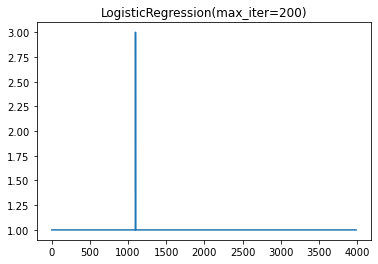

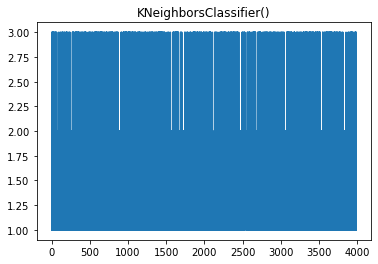

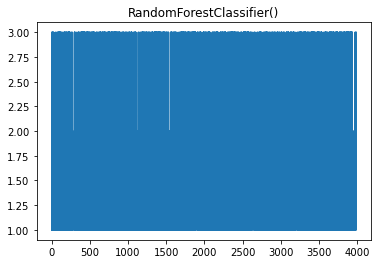

In [197]:
for i, model in enumerate(models):
    model.fit(X2_tr, y2_train)
    plt.figure()
    plt.plot(model.predict(X2_te))
    plt.title(model)

# Hyperparameter Tuning

In [198]:
param_search = {}
param_search[0] = {}
param_search[1] = {'n_neighbors' : [1, 5, 10, 20, 50, 100, 200], 'weights' : ['uniform', 'distance'], 
                       'leaf_size' : [5, 10, 20, 30, 50], 'p' : [1,2] ,'n_jobs' :[-1]}
param_search[2] = {'n_estimators' : [20, 50, 100, 200], 'n_jobs' : [-1]}
param_search[3] = {}
tuned_results = []
tuned_best_score = []
tuned_best_estimator = []
print(param_search)

{0: {}, 1: {'n_neighbors': [1, 5, 10, 20, 50, 100, 200], 'weights': ['uniform', 'distance'], 'leaf_size': [5, 10, 20, 30, 50], 'p': [1, 2], 'n_jobs': [-1]}, 2: {'n_estimators': [20, 50, 100, 200], 'n_jobs': [-1]}, 3: {}}


In [199]:
#for i, model in enumerate(models):
    #if name != 'LR':
#    gsearch = GridSearchCV(estimator=model, param_grid = param_search[i], scoring = 'accuracy')
    #if name != 'RFR':
#    gsearch.fit(X_tr, y_train)
    #else :
       # gsearch.fit(X_tr, y_train.values.ravel())
#    best_score = gsearch.best_score_
#    best_model = gsearch.best_estimator_
#    tuned_results.append(gsearch)
#    tuned_best_score.append(best_score)
#    tuned_best_estimator.append(best_model)
#    print(best_model, best_score)

In [200]:
#for model in tuned_best_estimator:
#    model.fit(X_tr, y_train)
#    plt.figure()
#    plt.plot(model.predict(X_te))
#    print(model)
#plt.show()

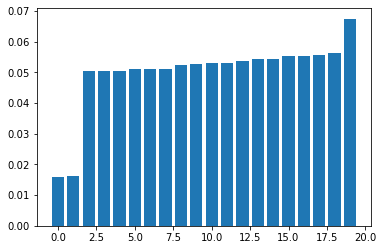

In [201]:
importance = rf.feature_importances_
importance.sort()
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [202]:
plt.hist(df['match_winner'])

(array([6155.,    0.,    0.,    0.,    0., 3373.,    0.,    0.,    0.,
        3769.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

In [203]:
from sklearn.metrics import confusion_matrix
pl_list = []
for i, model in enumerate(models):
    y2_pred = model.predict(X2_te)
    pl_list.append(confusion_matrix(y2_test,y2_pred))

In [207]:
class_names=['3', '2', '1'] # name  of classes

In [208]:
def plot_confusion_matrix(cm, classes ,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1862    0    1]
 [ 972    0    0]
 [1155    0    0]]
Confusion matrix, without normalization
[[1331  315  217]
 [ 640  182  150]
 [ 759  212  184]]
Confusion matrix, without normalization
[[1543  136  184]
 [ 742   72  158]
 [ 817   83  255]]
Confusion matrix, without normalization
[[1862    0    1]
 [ 972    0    0]
 [1155    0    0]]
Confusion matrix, without normalization
[[1775    2   86]
 [ 916    2   54]
 [1042    1  112]]


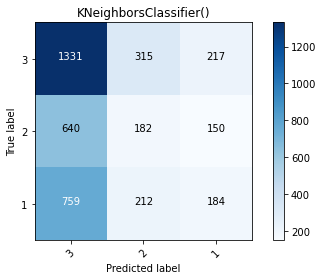

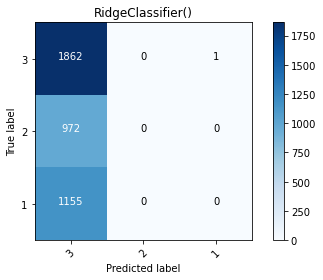

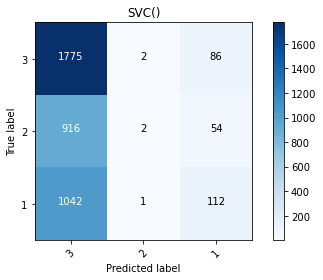

In [209]:
for i, model in enumerate(models):
    plot_confusion_matrix(pl_list[i], class_names, title=model)

In [210]:
features

['free_kick_accuracy_a',
 'finishing_h',
 'long_passing_h',
 'curve_a',
 'home_defenders',
 'crossing_h',
 'away_defenders',
 'chanceCreationPassing_a',
 'shot_power_a',
 'crossing_a',
 'stamina_a',
 'gk_reflexes_h',
 'sprint_speed_h',
 'gk_diving_h',
 'gk_positioning_a',
 'balance_h',
 'acceleration_h',
 'gk_handling_a',
 'free_kick_accuracy_h',
 'dribbling_h']

free_kick_accuracy_a
finishing_h
long_passing_h
curve_a
home_defenders
crossing_h
away_defenders
chanceCreationPassing_a
shot_power_a
crossing_a
stamina_a
gk_reflexes_h
sprint_speed_h
gk_diving_h
gk_positioning_a
balance_h
acceleration_h
gk_handling_a
free_kick_accuracy_h
dribbling_h


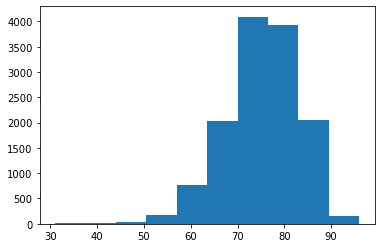

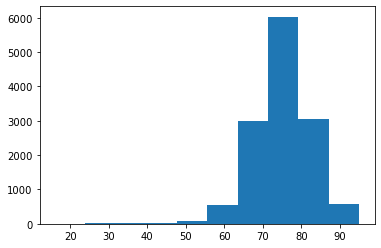

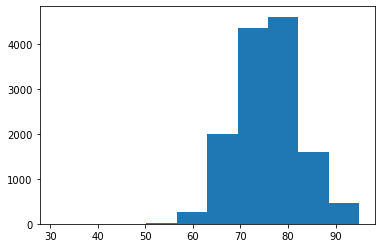

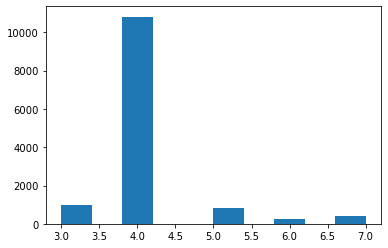

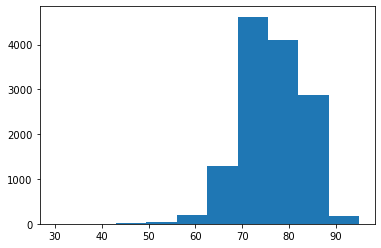

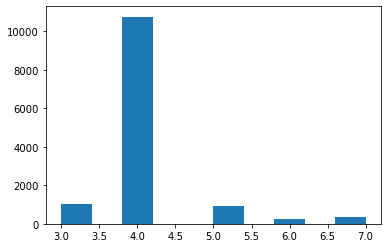

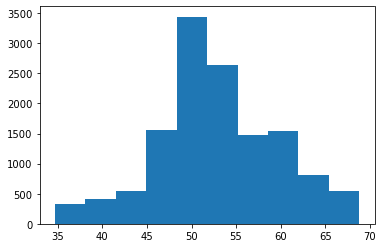

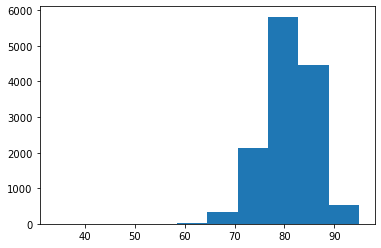

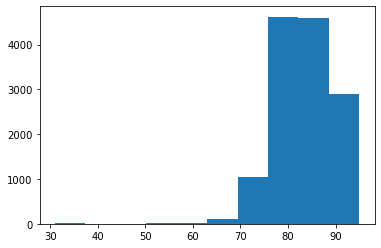

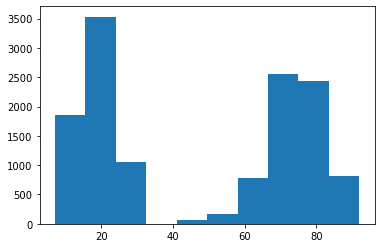

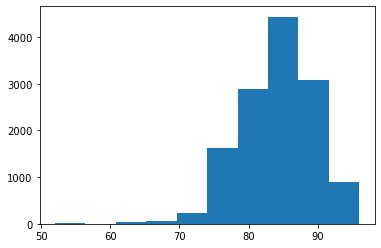

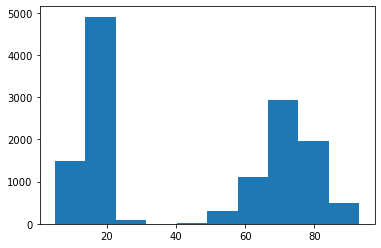

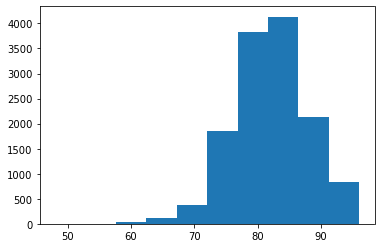

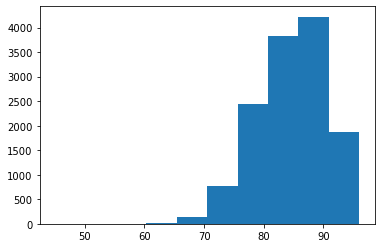

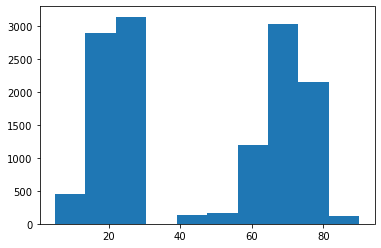

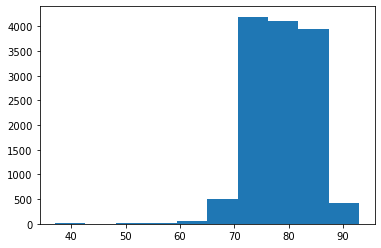

In [223]:
for i in features:
    print(i)
    plt.figure()
    plt.hist(df[i])

In [231]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(),
    LogisticRegression(max_iter=200),
)

In [232]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [236]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [237]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [238]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=200))]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [240]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [243]:
print(lr_grid_cv.best_params_)
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

{'selectkbest__k': 44}


In [244]:
pipe2 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(k=44),
    LogisticRegression(max_iter=200),
)

In [245]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=44)),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [248]:
y_pred = pipe2.predict(X_test)

In [251]:
cf = confusion_matrix(y_test,y_pred)

In [252]:
plot_confusion_matrix(cf, class_names, title='Logistic')

Confusion matrix, without normalization
[[1508   12  299]
 [ 820    9  224]
 [ 737    5  376]]


In [253]:
importance = pipe2.feature_importances_
importance.sort()
plt.bar([x for x in range(len(importance))], importance)
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [187]:
kbest_score = {}
for i, score in enumerate(skb.scores_):
    #print(X_train.columns.values[i], score)
    kbest_score[X_train.columns.values[i]] = score

In [254]:
sorted_values = sorted(kbest_score.values(), reverse=True) # Sort the values
kbest_sorted = {}
for i in sorted_values:
    for k in kbest_score.keys():
        if kbest_score[k] == i:
            kbest_sorted[k] = kbest_score[k]
            break
print(kbest_sorted)

{'buildUpPlayPassing_h': 81.90724385968889, 'defencePressure_a': 77.68463052053018, 'buildUpPlayPassing_a': 76.62631898110682, 'defencePressure_h': 68.15745446168533, 'chanceCreationShooting_h': 30.72459740662652, 'interceptions_a': 28.603195266336108, 'chanceCreationShooting_a': 28.16873000380979, 'possession_h': 15.1942238973895, 'vision_h': 14.890572297013604, 'interceptions_h': 12.99113488768439, 'away_strikers': 11.235765519864557, 'defenceAggression_a': 11.136874549094873, 'defenceTeamWidth_a': 10.341126325468851, 'heading_accuracy_a': 10.294047971900262, 'defenceAggression_h': 9.895751764710184, 'defenceTeamWidth_h': 9.402922669093543, 'positioning_a': 8.885799640702036, 'volleys_h': 8.234677642372453, 'standing_tackle_h': 8.216783298657624, 'reactions_a': 7.460395019203794, 'aggression_a': 7.396953956705028, 'standing_tackle_a': 7.123940006119333, 'short_passing_a': 6.808360913607796, 'vision_a': 6.735743156822005, 'aggression_h': 6.029485974237208, 'away_midfielders': 5.764043

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

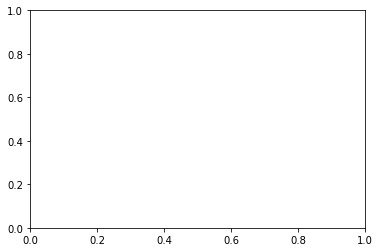

In [256]:
plt.bar([x for x in range(44)], kbest_sorted)
plt.show()

In [ ]:
pl_list.append(confusion_matrix(y2_test,y2_pred))

In [226]:
models

[LogisticRegression(max_iter=200),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 RidgeClassifier(),
 SVC()]